## Bike Sharing Assignment by Tushar Prasad

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-Which variables are significant in predicting the demand for shared bikes.
-How well those variables describe the bike demands

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# setting the style for seaborn plots
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Reading and Understanding the Dataset

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape ## checking the shape

(730, 16)

In [5]:
df.info() ## no null values identified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [6]:
df.describe() ## Checking a summary of the data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [7]:
## Dropping unnecessary columns

dropped_columns = ['instant','dteday','casual','registered']
df.drop(dropped_columns,inplace=True,axis=1)

In [8]:
## converting season into categorical variables

df['season'] = df['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})

In [9]:
## converting month into categorical variables

df['mnth'] = df['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [10]:
## converting weekday into categorical variables

df['weekday'] = df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [11]:
## converting weathersituation into categorical variables

df['weathersit'] = df['weathersit'].map({1:'Clear-Few clouds',2:'Mist-Broken clouds',3:'Light Snow-Light Rain',4:'Heavy Rain-Ice Pallets'})

## EDA & Visualisations

### Univariate Analysis with categorical variables

#### Analysis of season

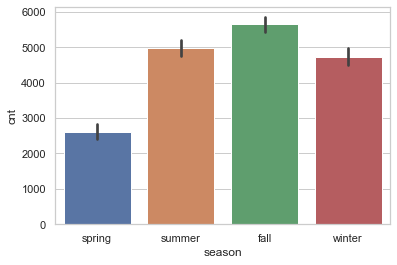

In [12]:
sns.barplot(x = 'season', y = 'cnt', data = df);

## fall has more bookings and spring has the least, hence, there is a correlation with the bookings

#### Analysis of year

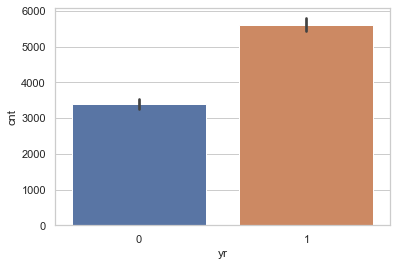

In [13]:
sns.barplot(x = 'yr', y = 'cnt', data = df);

## Noticiable increase in bookings in 2019 than 2018 hence the correlation with the bookings

#### Analysis of month

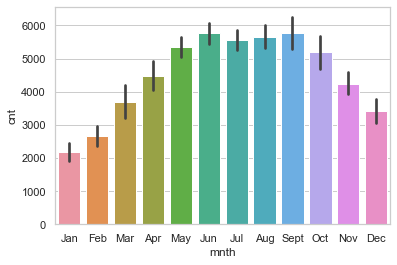

In [14]:
sns.barplot(x = 'mnth', y = 'cnt', data = df);

# from may to Oct, the values increase by a large amount, hence there is some correlation with the months and bookings.
# peak bookings in Jun and Sept
# least bookings in Jan and Feb

#### Analysis of holiday

In [15]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

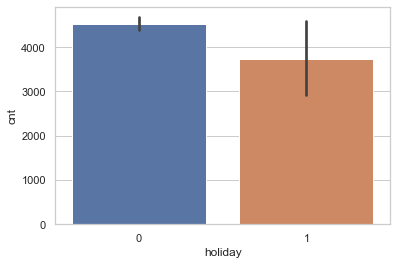

In [16]:
sns.barplot(x = 'holiday', y = 'cnt', data = df);

## Since, there are way more working days than holidays, we cannot use this variable the way it is as a predictor
## Despite the few amount of holidays, the bookings on those days is decently high. 
## Maybe we can create some derived variable in future to represent this metric with more accuracy

#### Analysis of weekdays

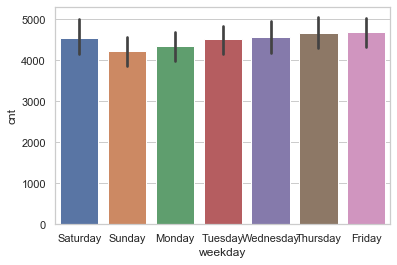

In [17]:
sns.barplot(x = 'weekday', y = 'cnt', data = df);

## weekday as a variable is very consistent with the bike counts. It may or may not correlated with the target variable,
## so we can keep it for now and decide after evaluation 
## there is a small trend in the weekdays with the bookings. 
## the bookings increase as we move from Sunday to next saturday, and dips from saturday to sunday

#### Analysis of working day

In [18]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

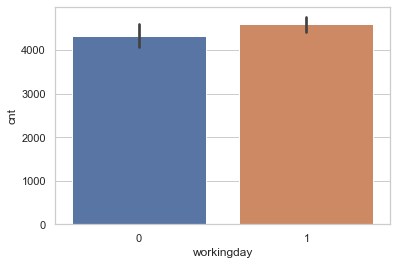

In [19]:
sns.barplot(x = 'workingday', y = 'cnt', data = df);

## similar to the holiday variable, there are way more working days than non working days.
## hence we cannot directly use this variable. 
## despite that the bookings on non workingday is decently high
## hence, it can create some derived variable in future to better represent this metric

#### Analysis of weather situation

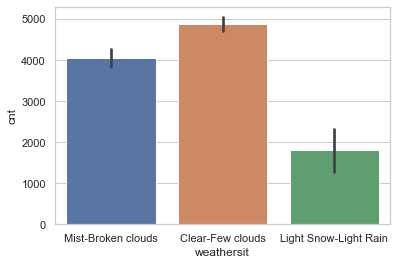

In [20]:
sns.barplot(x = 'weathersit', y = 'cnt', data = df);

## Clearly, most of the bookings happen during Clear,few clouds followed by mist-broken clouds, where as 
## Light snow - light rain don't get a lot of bookings and currently there are no bookings in Heavy rain and ice pallets category
## hence, it should be a good predictor and have a good correlation with the bookings

#### Converting the categorical variables into numeric variables using dummy method.

#### Also dropping one level by drop_first = True, since a categorical feature with n levels can be represented by n-1 dummy variables

In [21]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop(x, axis = 1, inplace = True)
    return df

In [22]:
df = dummies('season',df)
df = dummies('mnth',df)
df = dummies('weekday',df)
df = dummies('weathersit',df)

In [23]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow-Light Rain,Mist-Broken clouds
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Splitting data into Train and test data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
## setting the seed as 0 for consistency
## splitting the data into 7:3 ratio

np.random.seed(0)

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3)

In [26]:
df_train.shape ## shape of train data

(510, 30)

In [27]:
df_test.shape ## shape of test data

(219, 30)

### Pair wise analysis for numerical variables

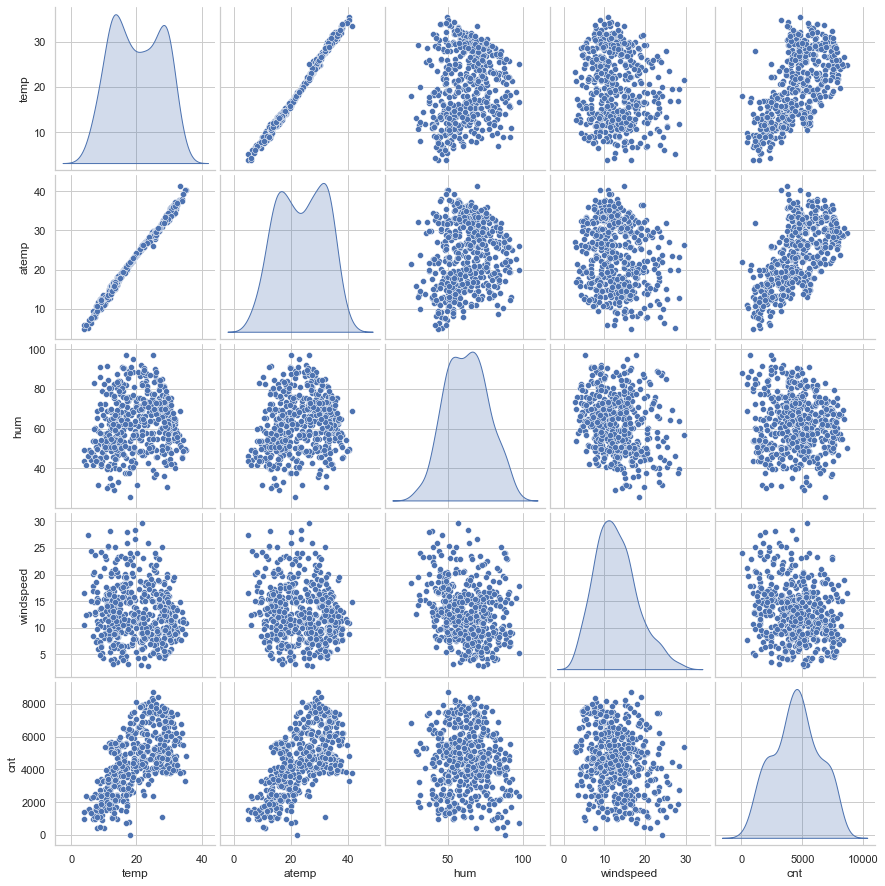

In [28]:
# we can see patterns between variables 
sns.pairplot(df_train[[ 'temp','atemp', 'hum', 'windspeed','cnt']],diag_kind='kde')
plt.show()

#### We can see that Temp and atemp are highly correlated and they are also positively correlated with cnt

### Creating a heat map with all the variables

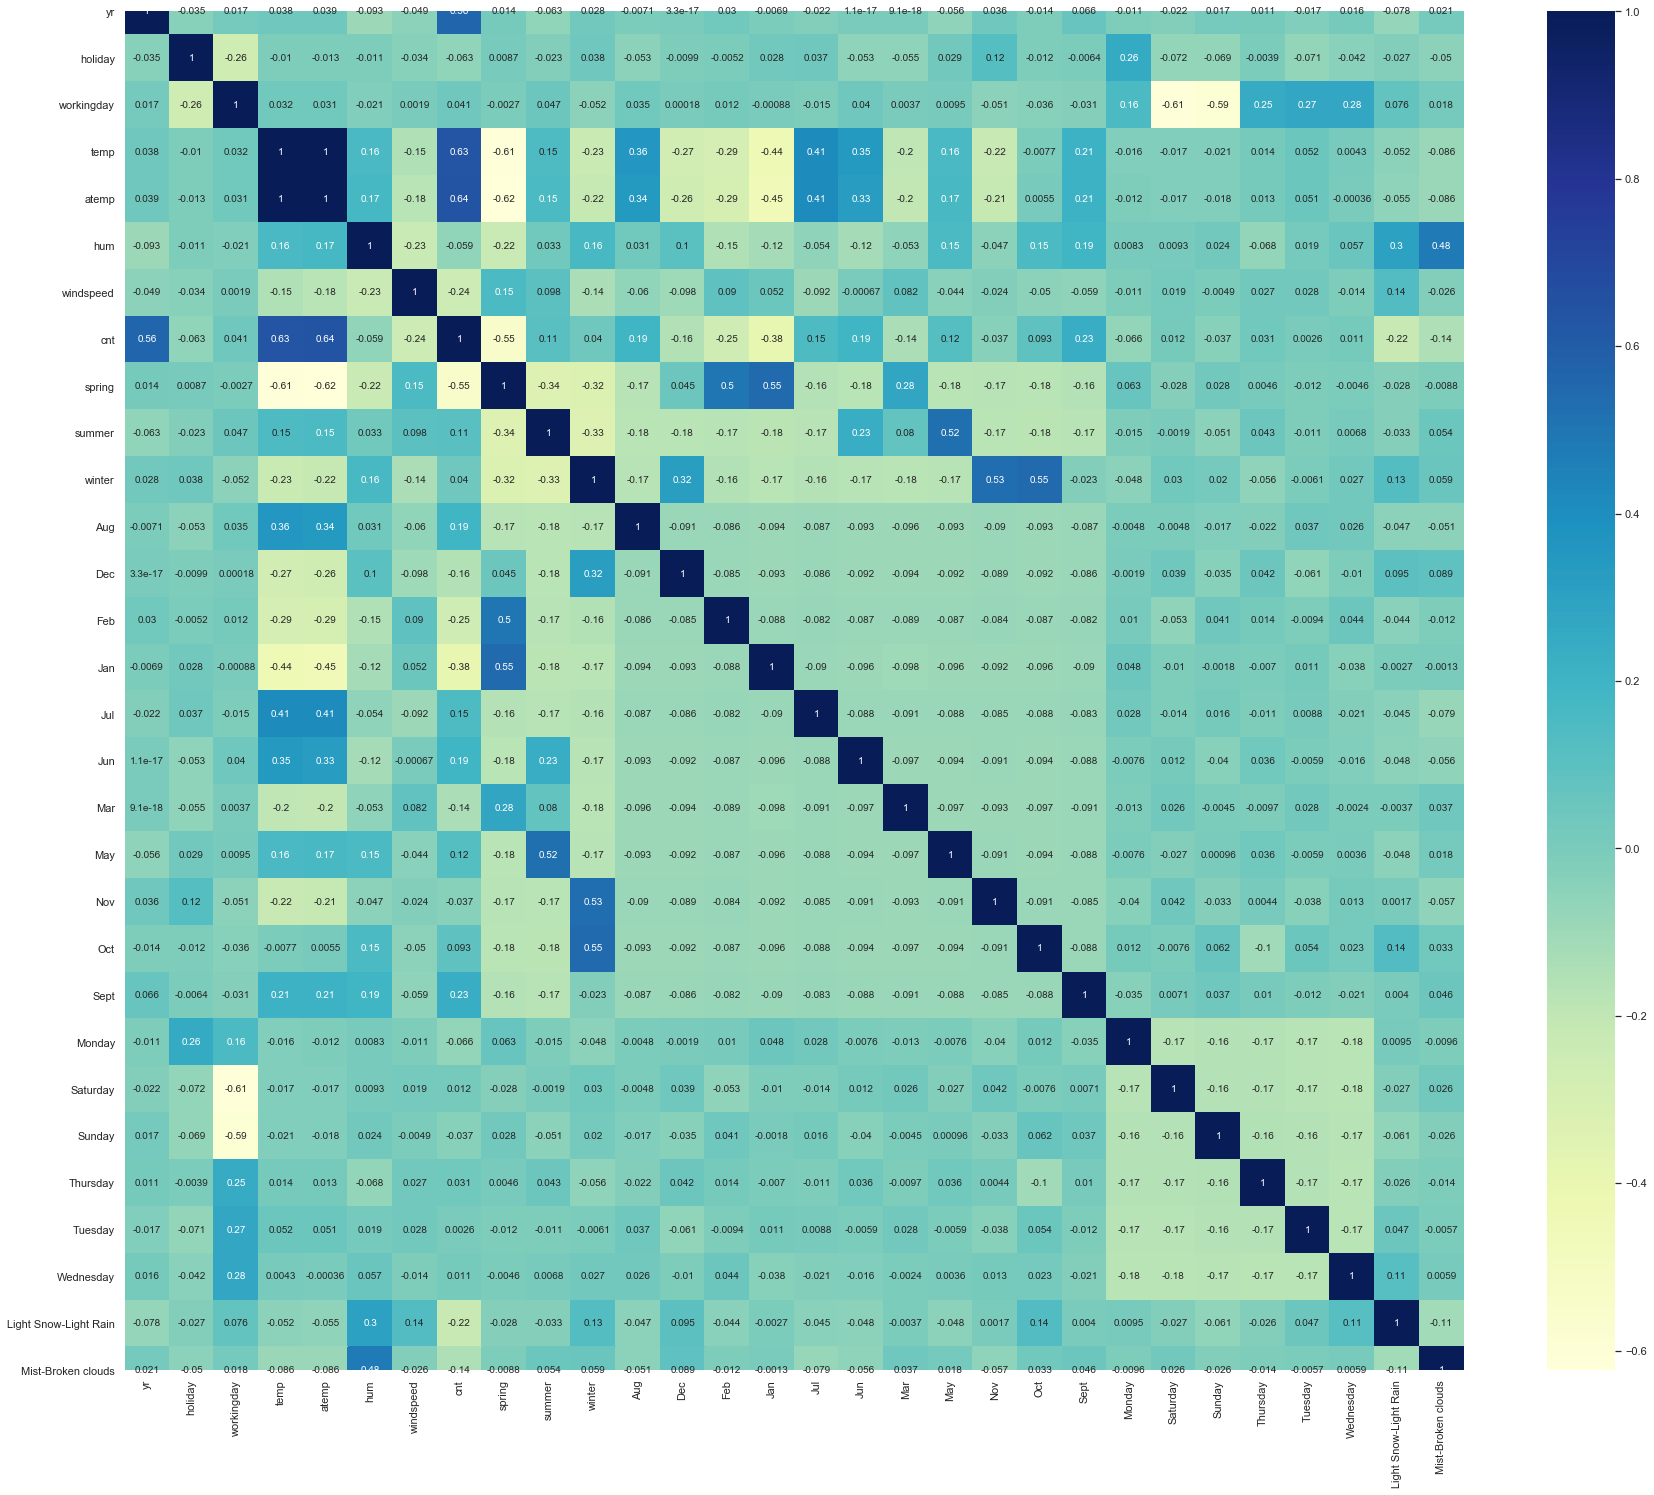

In [29]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Using the heat map, we can see the multicollinearity between the independent variables as well as which variables are highly correlated with the target variable

## Rescaling

In [30]:
## we will use minmax scaling since it will automatically take care of the outliers

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
## scaling only the numeric variables for better interpretability

numeric_var = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])

df_train.head()

C:\Users\tushar.prasad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow-Light Rain,Mist-Broken clouds
235,0,0,1,0.753859,0.731037,0.488399,0.527988,0.587667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
12,0,0,1,0.089497,0.071535,0.301044,0.647940,0.159227,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.796115,0.557424,0.281887,0.568799,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
df_train.describe() ## seeing the summary of the numeric variables

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow-Light Rain,Mist-Broken clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.690196,0.515088,0.510792,0.514523,0.373755,0.513956,0.245098,0.258824,0.239216,0.084314,0.082353,0.074510,0.088235,0.076471,0.086275,0.090196,0.086275,0.080392,0.086275,0.076471,0.145098,0.145098,0.135294,0.141176,0.143137,0.154902,0.023529,0.335294
std,0.500491,0.169124,0.462867,0.243011,0.227658,0.194619,0.192867,0.217056,0.430568,0.438419,0.427024,0.278131,0.275172,0.262857,0.283915,0.266010,0.281045,0.286744,0.281045,0.272166,0.281045,0.266010,0.352545,0.352545,0.342373,0.348545,0.350557,0.362166,0.151726,0.472557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.301603,0.311891,0.361513,0.232054,0.365221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.503362,0.514074,0.513631,0.353541,0.521859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.734800,0.704145,0.651342,0.483991,0.670156,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
## Dividing the data into x_train and y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow-Light Rain,Mist-Broken clouds
235,0,0,1,0.753859,0.731037,0.488399,0.527988,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
12,0,0,1,0.089497,0.071535,0.301044,0.647940,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.796115,0.557424,0.281887,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
y_train.head()

235    0.587667
524    0.860101
12     0.159227
161    0.568799
556    0.833180
Name: cnt, dtype: float64

## Model Building

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

In [37]:
## Using RFE to find out top 15 features

lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [38]:
## Shows all the columns with the rfe rankings and whether they have been considered important or not

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 13),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Monday', False, 5),
 ('Saturday', False, 3),
 ('Sunday', False, 7),
 ('Thursday', False, 14),
 ('Tuesday', False, 8),
 ('Wednesday', False, 15),
 ('Light Snow-Light Rain', True, 1),
 ('Mist-Broken clouds', False, 2)]

In [39]:
## columns which we are considering to add in our model

X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sept', 'Light Snow-Light Rain'], dtype='object')

In [40]:
## columns which we are going to ignore using rfe and hence, not add in our model

X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'summer', 'Aug', 'Jun', 'Mar', 'Oct', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Mist-Broken clouds'], dtype='object')

In [41]:
## selecting only those columns selected by rfe

X_train_1 = X_train[X_train.columns[rfe.support_]]
X_train_1.head()

,yr,temp,atemp,hum,windspeed,spring,winter,Dec,Feb,Jan,Jul,May,Nov,Sept,Light Snow-Light Rain
235,0,0.753859,0.731037,0.488399,0.527988,0,0,0,0,0,0,0,0,0,0
524,1,0.802869,0.755332,0.254640,0.255430,0,0,0,0,0,0,0,0,0,0
12,0,0.089497,0.071535,0.301044,0.647940,1,0,0,0,1,0,0,0,0,0
161,0,0.821384,0.796115,0.557424,0.281887,0,0,0,0,0,0,0,0,0,0
556,1,0.810494,0.757949,0.527842,0.274080,0,0,0,0,0,1,0,0,0,0


In [42]:
##  creating a make model function to modularise the code

def make_model(X,y):

    X_train_lr = sm.add_constant(X)

    lr = sm.OLS(y_train, X_train_lr).fit()

    print(lr.summary())
    return(X_train_lr)

In [43]:
##  creating a get VIF function to modularise the code

def get_vif(X):

    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [44]:
X_train_2 = make_model(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.30e-175
Time:                        23:14:09   Log-Likelihood:                 499.65
No. Observations:                 510   AIC:                            -967.3
Df Residuals:                     494   BIC:                            -899.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

#### P value of temp is very high i.e > 0.05

In [45]:
get_vif(X_train_2)

,Features,VIF
3,atemp,184.95
2,temp,183.36
0,const,50.99
6,spring,3.91
7,winter,2.44
10,Jan,2.28
9,Feb,1.94
13,Nov,1.74
8,Dec,1.57
4,hum,1.40


#### VIF of the temp and atemp is very high

#### Hence we will drop temp due to high p value and VIF for now and recalculate

In [46]:
X_train_2 = X_train_2.drop(["temp"], axis = 1)

### Model 2

In [47]:
X_train_3 = make_model(X_train_2,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.47e-176
Time:                        23:14:09   Log-Likelihood:                 499.24
No. Observations:                 510   AIC:                            -968.5
Df Residuals:                     495   BIC:                            -905.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.35

#### Feb has a high P value

In [48]:
get_vif(X_train_3)

,Features,VIF
0,const,48.37
5,spring,3.91
2,atemp,3.54
6,winter,2.39
9,Jan,2.27
8,Feb,1.94
12,Nov,1.74
7,Dec,1.57
3,hum,1.38
10,Jul,1.36


### Feb has a high p Value. Hence, we will drop it

In [49]:
X_train_3 = X_train_3.drop(["Feb"], axis = 1)

### Model 3

In [50]:
X_train_4 = make_model(X_train_3,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     176.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.19e-176
Time:                        23:14:09   Log-Likelihood:                 496.13
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     496   BIC:                            -905.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

#### Jan has a high P-value

In [51]:
get_vif(X_train_4)

,Features,VIF
0,const,47.31
2,atemp,3.45
5,spring,2.94
6,winter,2.39
11,Nov,1.71
8,Jan,1.59
7,Dec,1.44
3,hum,1.38
9,Jul,1.36
10,May,1.22


#### Jan has a high p-value, hence we will drop it

In [52]:
X_train_4 = X_train_4.drop(["Jan"], axis = 1)

### Model 4

In [53]:
X_train_5 = make_model(X_train_4,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     189.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.38e-177
Time:                        23:14:09   Log-Likelihood:                 494.28
No. Observations:                 510   AIC:                            -962.6
Df Residuals:                     497   BIC:                            -907.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

#### Dec has a high p value

In [54]:
get_vif(X_train_5)

,Features,VIF
0,const,44.83
2,atemp,3.18
5,spring,2.80
6,winter,2.38
10,Nov,1.68
3,hum,1.38
7,Dec,1.36
8,Jul,1.34
9,May,1.22
12,Light Snow-Light Rain,1.19


#### Since Dec has a high p value, we can drop it

In [55]:
X_train_5 = X_train_5.drop(["Dec"], axis = 1)

### Model 5

In [56]:
X_train_6 = make_model(X_train_5,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.68e-177
Time:                        23:14:09   Log-Likelihood:                 492.23
No. Observations:                 510   AIC:                            -960.5
Df Residuals:                     498   BIC:                            -909.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

#### Nov has a high p value

In [57]:
get_vif(X_train_6)

,Features,VIF
0,const,43.36
2,atemp,3.01
5,spring,2.79
6,winter,2.17
9,Nov,1.47
3,hum,1.38
7,Jul,1.34
8,May,1.22
11,Light Snow-Light Rain,1.19
4,windspeed,1.17


#### Dropping Nov due to high p value

In [58]:
X_train_6 = X_train_6.drop(["Nov"], axis = 1)

## Model 6

In [59]:
X_train_7 = make_model(X_train_6,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.35e-177
Time:                        23:14:10   Log-Likelihood:                 489.49
No. Observations:                 510   AIC:                            -957.0
Df Residuals:                     499   BIC:                            -910.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

#### May has a high p value

In [60]:
get_vif(X_train_7)

,Features,VIF
0,const,42.16
2,atemp,2.93
5,spring,2.73
6,winter,1.88
3,hum,1.36
7,Jul,1.34
8,May,1.22
10,Light Snow-Light Rain,1.19
4,windspeed,1.17
9,Sept,1.16


#### Dropping May due to high p value

In [61]:
X_train_7 = X_train_7.drop(["May"], axis = 1)

## Model 7

In [62]:
X_train_8 = make_model(X_train_7,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.04e-176
Time:                        23:14:10   Log-Likelihood:                 485.06
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     500   BIC:                            -907.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

#### P values look very controlled

In [63]:
get_vif(X_train_8)

,Features,VIF
0,const,41.90
2,atemp,2.93
5,spring,2.60
6,winter,1.74
3,hum,1.32
7,Jul,1.29
9,Light Snow-Light Rain,1.18
4,windspeed,1.17
8,Sept,1.11
1,yr,1.04


#### Apart from Const, we have low VIF for all the features

### From the final model we can see that, P values for all the features are very low, hence significant. As well as VIF for the business features is below 3, hence making sure they are not multicollinear.

#### Prob(F-Statistic) is also very low, making the model significant.
#### R value is 8.14 and Adjusted R-value is 8.11 on the training data

## Residual Analysis of the model

In [64]:
### Getting the predicted values from the training set

lr = sm.OLS(y_train,X_train_8).fit()
y_train_cnt= lr.predict(X_train_8)

Text(0.5, 0, 'Errors')

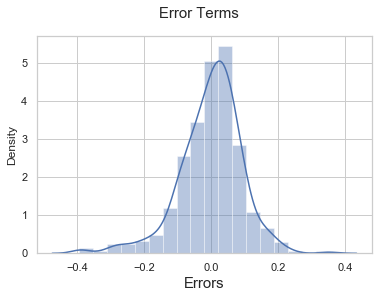

In [65]:
# Plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 18)
fig.suptitle('Error Terms', fontsize = 15)               
plt.xlabel('Errors', fontsize = 15)   

#### From the graph we can see a few things.
1. The residuals follow a normal distribution.
2. The mean of residuals is centred around 0.

#### Hence, confiming the assumption of normality of a linear regression model

Text(0, 0.5, 'residuals')

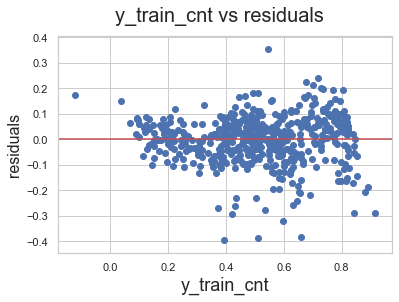

In [66]:
## scatterplot of the residuals with the y_train predicted value

fig = plt.figure()
plt.scatter(y_train_cnt,y_train - y_train_cnt)
plt.axhline(y = 0, color = 'r', linestyle = '-')
fig.suptitle('y_train_cnt vs residuals', fontsize=20)            
plt.xlabel('y_train_cnt', fontsize=18)                       
plt.ylabel('residuals', fontsize=16)   

#### From the above graph, we can see that no patterns emerge on the residual terms with increase in y_train_cnt. The spread of residuals isn't increase or decreasing with y_train_cnt. Hence, leading to a constant variance and confirming the law of homeoelastidicity in linear regression.

## Model prediction and evaluation

In [67]:
#Scaling the test set
## notice we are only using transform rather than fit transform

numeric_var = ['temp','atemp', 'hum', 'windspeed', 'cnt']
df_test[numeric_var] = scaler.transform(df_test[numeric_var])

In [68]:
df_test.describe() ## Checking the summary of the numeric terms

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow-Light Rain,Mist-Broken clouds
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.027397,0.666667,0.537535,0.530211,0.533186,0.365412,0.520493,0.251142,0.237443,0.251142,0.086758,0.091324,0.082192,0.077626,0.105023,0.073059,0.073059,0.082192,0.082192,0.082192,0.095890,0.141553,0.141553,0.164384,0.146119,0.141553,0.109589,0.041096,0.342466
std,0.501140,0.163612,0.472484,0.230350,0.215531,0.206381,0.198115,0.236180,0.434663,0.426491,0.434663,0.282125,0.288730,0.275286,0.268194,0.307285,0.260830,0.260830,0.275286,0.275286,0.275286,0.295115,0.349389,0.349389,0.371472,0.354034,0.349389,0.313092,0.198967,0.475622
min,0.000000,0.000000,0.000000,-0.048868,-0.027173,-0.353829,-0.049874,0.067073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359598,0.370098,0.386311,0.226618,0.354809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.564352,0.567870,0.529582,0.327053,0.519673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722275,0.693736,0.678414,0.463343,0.723194,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.982573,1.019965,0.986079,1.165056,0.981707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
#Dividing into X and y

y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test and
# selecting only those columns which we have found out using rfe and manual data coarsing
X_test_new = X_test_new[X_train_8.columns]


In [71]:
## predicting y test values using the lr model we built earlier

y_pred = lr.predict(X_test_new)

In [72]:
## finding the r2 squared value as a metric for out model

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(r2)

0.8361630889360423


#### Hence, we are getting a r2 score of approx 0.84 in our test data

In [73]:
## Also finding out r2 adjusted score

# We already have the value of r2
# n is number of rows in X
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8282863143656597

#### Hence, we are getting a r2 adjusted score of approx 0.83 in our test data

Text(0, 0.5, 'y_pred')

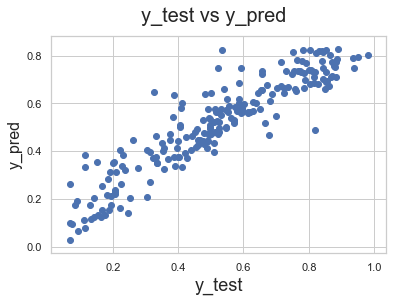

In [74]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

#### From the above graph, we can see that y_pred and y_test values are highly positively correlated. Also, the spread of data is very compact. All these factors lead to the fact that the model generalises very well in the test data.

In [75]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.04e-176
Time:                        23:14:12   Log-Likelihood:                 485.06
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     500   BIC:                            -907.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3209      0.027     11.860      0.000       0.268       0.374
yr                        0.2178      0.009     25.589      0.000       0.201       0.235
atemp                     0.5086      0.031     16.170      0.000       0.447       0.570
hum                      -0.2052      0.025     -8.298      0.000      -0.254      -0.157
windspeed                -0.1270      0.023     -5.414      0.000      -0.173      -0.081
spring                   -0.1132      0.016     -7.222      0.000      -0.144      -0.082
winter                    0.0423      0.013      3.275      0.001       0.017       0.068
Jul                      -0.0825      0.018     -4.623      0.000      -0.118      -0.047
Sept                      0.0620      0.017      3.740      0.000       0.029       0.095
Light Snow-Light Rain    -0.1470      0.030     -4.907      0.000      -0.206      -0.088
==============================================================================
Omnibus:                       70.880   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.663
Skew:                          -0.750   Prob(JB):                     5.81e-35
Kurtosis:                       5.273   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the model summary, we can make our best fit line as well

#### cnt = 0.3209 + 0.2178**yr + 0.5086**atemp - 0.2052**hum - 0.1270**windspeed - 0.1132**spring + 0.0423**winter - 0.0825**Jul + 0.0620**Sept - 0.1470LightSnow-LightRain

In [76]:
abs(lr.params).sort_values(ascending=False)

atemp                    0.508626
const                    0.320926
yr                       0.217825
hum                      0.205182
Light Snow-Light Rain    0.146986
windspeed                0.126993
spring                   0.113226
Jul                      0.082534
Sept                     0.062044
winter                   0.042335
dtype: float64

### From the model parameters, we can see that atemp, yr and hum are the top 3 variables in magnitude which lead to a certain prediction. Hence, they are most important predictors.

### Hence, from the 30 variables we made earlier, we can see which 9-10 variables are the most important variables. We can also see how well those variables describe the bike demands

#### R2 score of our model on test data is 0.84 and the R2 adjusted score of our model on test data is 0.83

#### Some Business Interpretations from the coefficients

1. People prefer booking bikes when the temperature moderate or higher rather than during colder temperature.
2. During circumstances similar to 2019, there would be more bookings of the bikes than the circumstances of 2018.
3. People prefer booking bikes during lower humidity.
4. People defer from booking bikes during light rain or light snow.
5. People avoid booking bikes during high wind speeds.